# PROJECTS FLOW

#### 1. import all neccesary libraries
    1.drop the unnesccary columns
#### 2. Data cleaning
    1.handling missing values
    2. Handling inconsistent values
#### 3. Feature Engineering
#### 4. Outlier Detection -- usually data points that too exagerated
    1. standard deviation
    2. Simple domain knowledge

#### 5. Data Visualization
    1. scattered plot
    2. Histogram
#### 6. Model building
    1. kfold cross validation
    2. gride search  cv
    

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)



In [2]:
raw_data = pd.read_csv(r"C:\Users\test\OneDrive\Desktop\datascience_complete\ALL-ML-END-TO-END\Real Estate Prediction india\bengaluru_house_prices.csv")
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
raw_data.shape

(13320, 9)

In [4]:
raw_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

##### Lets investigate our data

In [5]:
raw_data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
#drop the availabilty column, we don't need it. we will asume our houses are available
data = raw_data.drop(["availability", "society","area_type", "balcony"],axis='columns')
data.shape

(13320, 5)

#### 2. Data Cleaning

In [7]:
#Handling missing values ----- I have 73 rolls where the value of bathroom is not available, 16 rolls where the size is not provided and 1 role that location is not provided
data.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# drop the rows that have issues
data1 = data.dropna()
data1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
data1.shape

(13246, 5)

we can see that the size feature has the values in the form of BHK and bedroom, we need to change it to be of a single value

### FEATURE ENGINEERING AND DIMENSIONAL REDUCTION TECHNIQUES
    1. Dimensionality Reduction
    2. Dimensionality course = other category

In [10]:
# using the lambad function we can fix this issue
data1["bhk"] = data1["size"].apply(lambda x: int(x.split(' ')[0]))
data1.bhk.unique()

C:\Users\test\AppData\Local\Temp\ipykernel_24012\3035205564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["bhk"] = data1["size"].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
2+3

5

In [13]:
data1[~data1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [15]:
data2 = data1.copy()
data2.total_sqft = data2.total_sqft.apply(convert_sqft_to_num)
data2 = data2[data2.total_sqft.notnull()]
data2.shape

(13200, 6)

In [16]:
data2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [17]:
(2100+2850)/2

2475.0

from the above, you can see alot of non unniformity, anytime i have a range i will take the avarge of the number, if its wierd enough i will remove it. therefore we will need to create a function to do that.

### Feature Engineering and Dimensionality Reduction
#### Add new features

In [18]:
data3 = data2.copy()
data3['price_per_sqft'] = data3['price']*100000/data3['total_sqft']
data3.shape

(13200, 7)

In [19]:
data3_stats = data3['price_per_sqft'].describe()
data3_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
data3.to_csv("bhp.csv",index=False)

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [21]:
#let remove every empty spaces in every locatioon. before then we will use lambda function to sort it
data3.location = data3.location.apply(lambda x: x.strip())

location_stats = data3["location"].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [22]:
location_stats.values.sum()

13200

In [23]:
#Lets come up with a threshold to say, any location less than 10 data points eill be called other locations
len(location_stats[location_stats<=10])


1047

In [24]:
# Now we can use this to qualify them into a general category called the other
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [25]:

len(data3.location.unique())  #our uunique locations are 1293 while our other is 1052

1287

#### Do some transformation

In [26]:
data3.location =data3.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(data3.location.unique()) #

241

In [27]:
data3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal using standard deviation and Mean
   *    outliers are data points that are too exagerated. imagine you have a house with total sqft of 1000 sqft and bedroom is 6, that means the total sqft is 6000 sqft, this is an outlier.
   and so we need to remove them.

In [28]:
# to remove IT, WE WILL create a new dataframe
# lets say we are given 300 AS OUR THRESHOLD
data3[data3.total_sqft/data3.bhk<300].head(5)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
data3.shape

(13200, 7)

     *    this result above siimply means that there are lot of houses that have less than 300 sqft per bedroom.and should be considered as outliers.
     *    so we will remove them. under

In [30]:
data4 = data3[~(data3.total_sqft/data3.bhk<300)]
data4.shape

(12456, 7)

    * we can see that some outliers were removed from the dataset.
** lets remove more.

Another way we can remove outliers is using standard deviation.   we call describe on the data and know the mean and standard deviation of the data.

In [31]:
data4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

##### Since stanaderd deviation is :
    @ value of dataset - mean of datset / standard deviation of the dataset. we usually give a threshold
        We use this function below to remove the outliers using standard deviation.

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data5 = remove_pps_outliers(data4)
data5.shape

# we have succesfully removed over 2000 outliers from our dataset

(10242, 7)

##  Data Visualization

    * since we couldn't remove all outliers. there are outliers in location and price. Example, some locations with same sqaure feet have dofferent prices.
    so we need to use a function to remove the outliers in location and price.

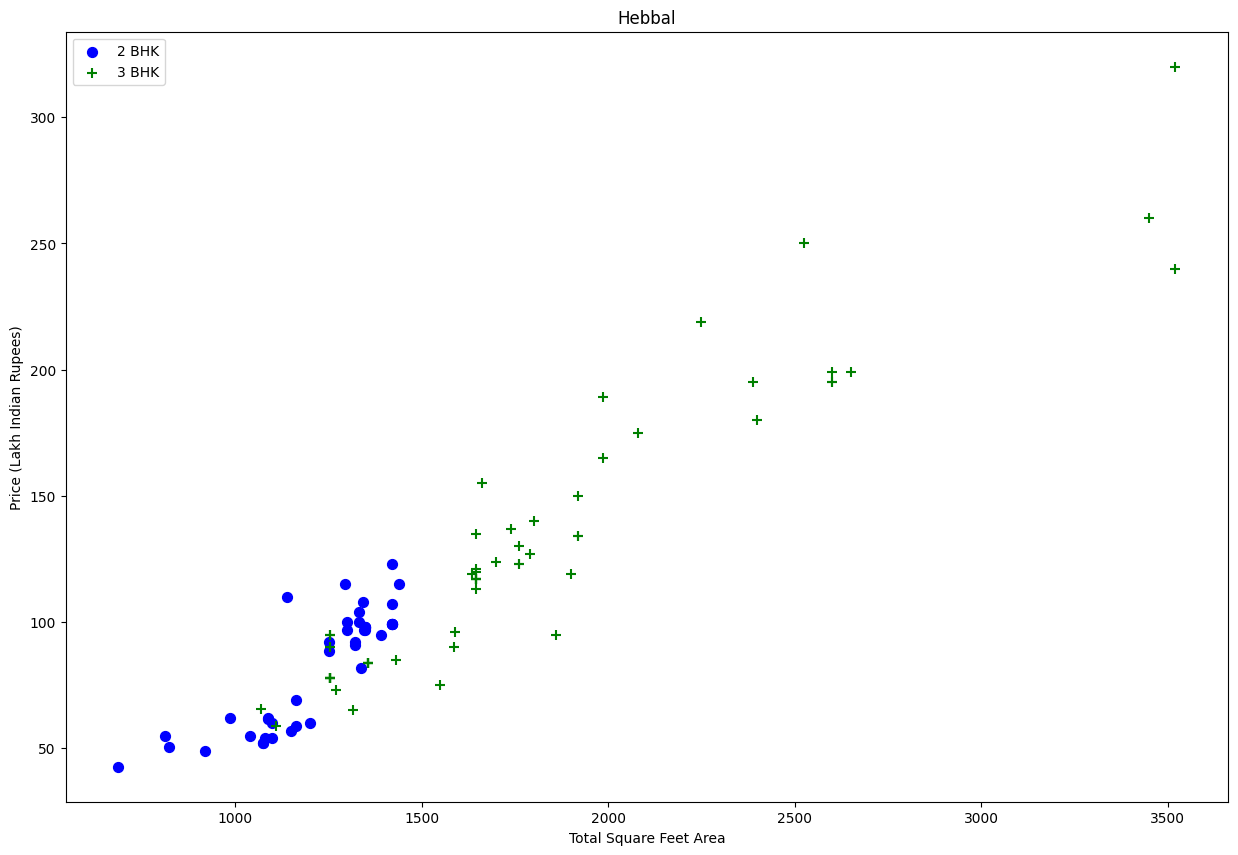

In [33]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)] #this and the next line compares two bedroom and 3 bedroom in the same location.
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50) # this line anf the next plot the graphs for 2 and 3 bedroom in the same location.
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data5,"Hebbal")

##### we need to remove properties in the same location, the price of (for example) 3 bedroom apartment in 2 bhk is less than 2 bedroom apartment(with same square ft area). we can build a dictionary of stats per bhk, ie

    {
        
        '1' : {
        'mean': 4000,
        'std': 2000,
            'count': 34
        },
        '2' : {
        'mean': 4300,
        'std': 2300,
            'count': 22
        },
    }

In [34]:


## Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
               'mean': np.mean(bhk_df.price_per_sqft),
               'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data6 = remove_bhk_outliers(data5)
data6.shape

(7317, 7)

##### lets plot our graph again to see changes.
    * we can see that the outliers are removed.

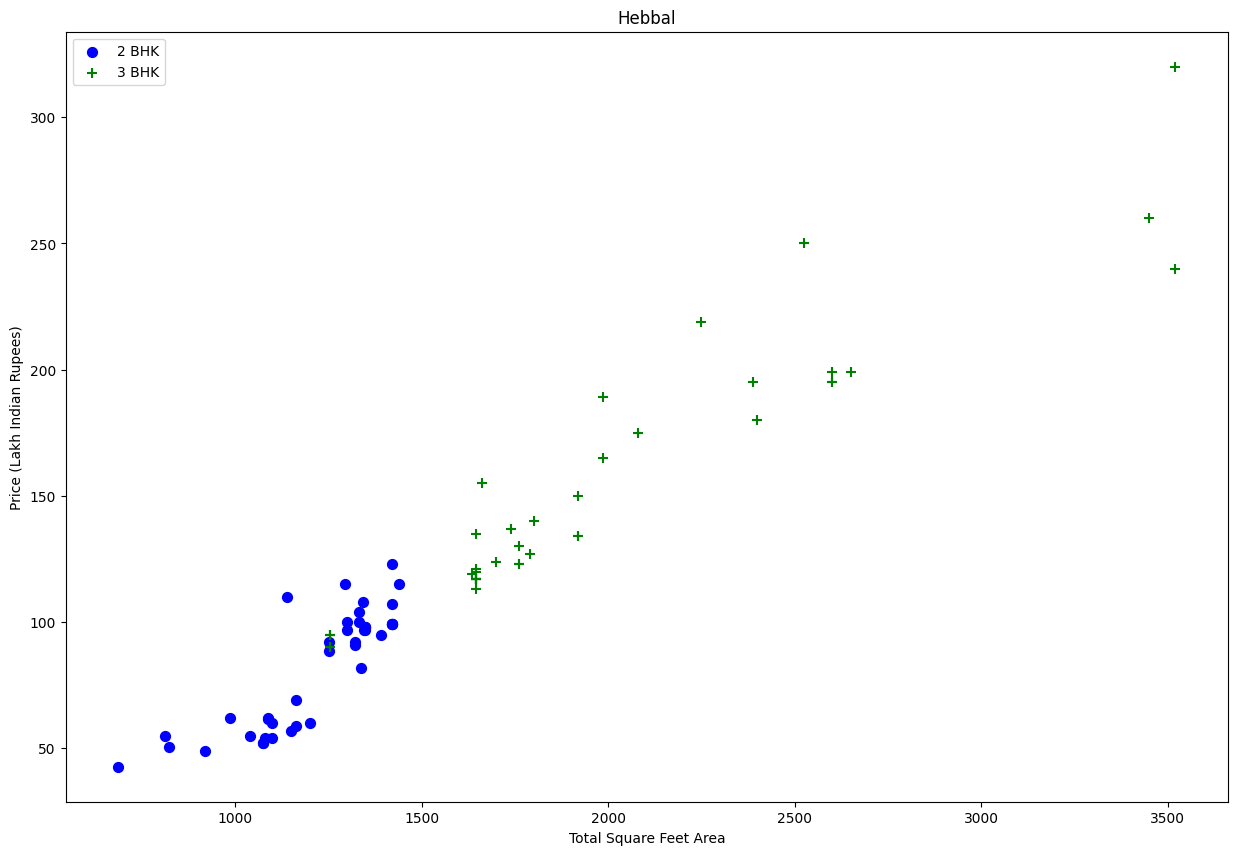

In [35]:
plot_scatter_chart(data6,"Hebbal")

### Histogram 
    since the out;iers are removed, we can plot a histogram to see how many properties i have in four foot area.

Text(0, 0.5, 'Count')

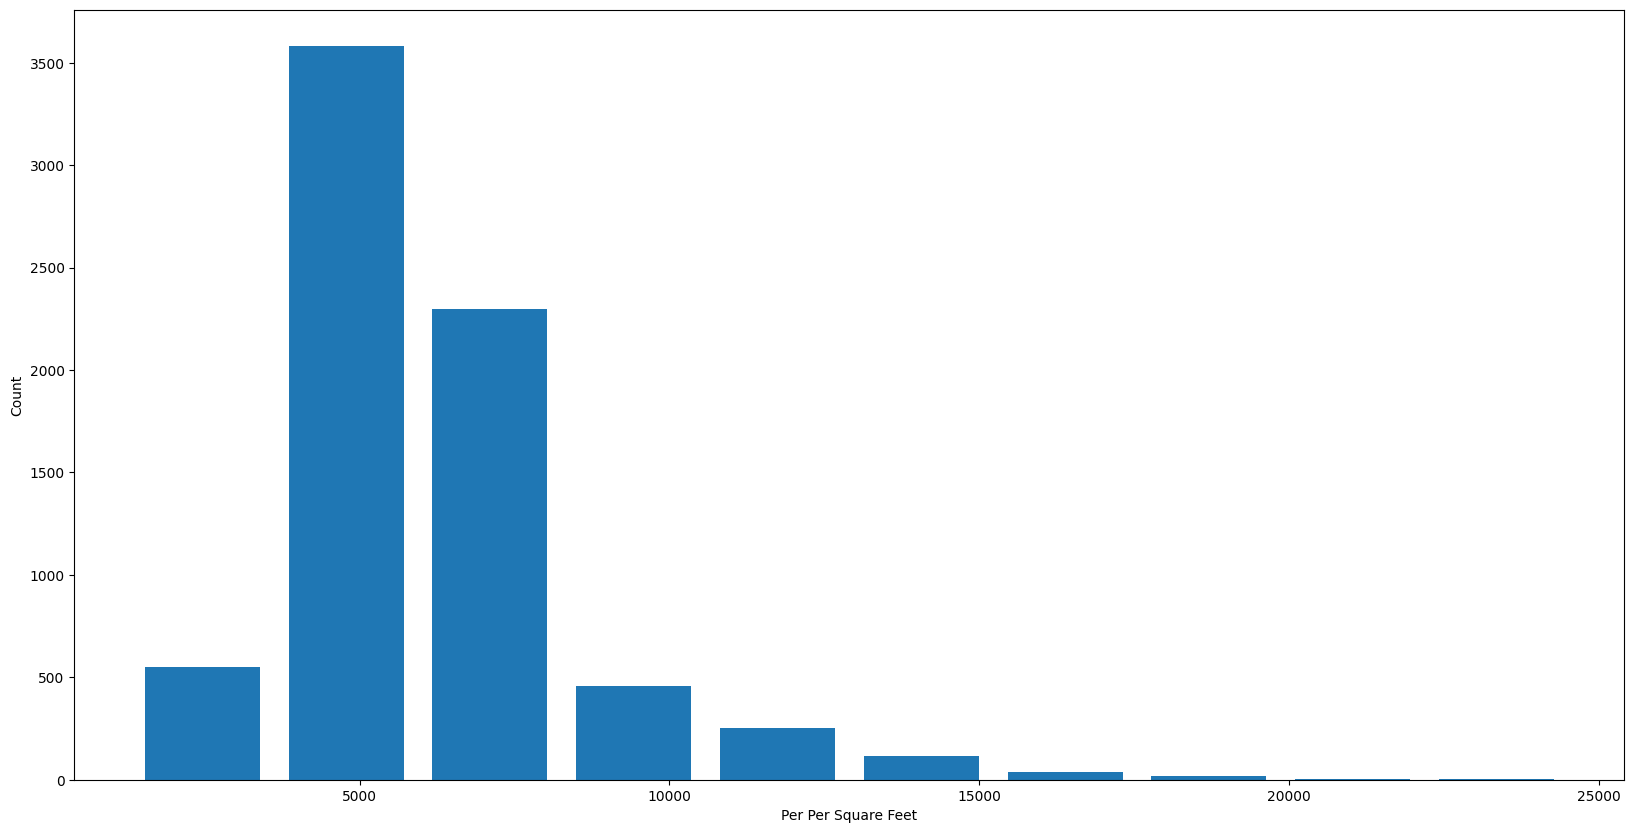

In [36]:
plt. rcParams['figure.figsize'] = (20,10)
plt.hist(data6.price_per_sqft,rwidth=0.8)
plt.xlabel("Per Per Square Feet")
plt.ylabel("Count")

    FINDING: This is a normal distribution, it looks good as all the datapoint are within 0-1000

#### lets explore houses with bathroom

In [37]:
data6.bath.unique()

# This shows that there are houses that have up to 13 bathrooms, which is very abnomal and should be considered an outlier

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [38]:
data6[data6.bath >10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


    *Lets plot the graph and see the distribution

Text(0, 0.5, 'Count')

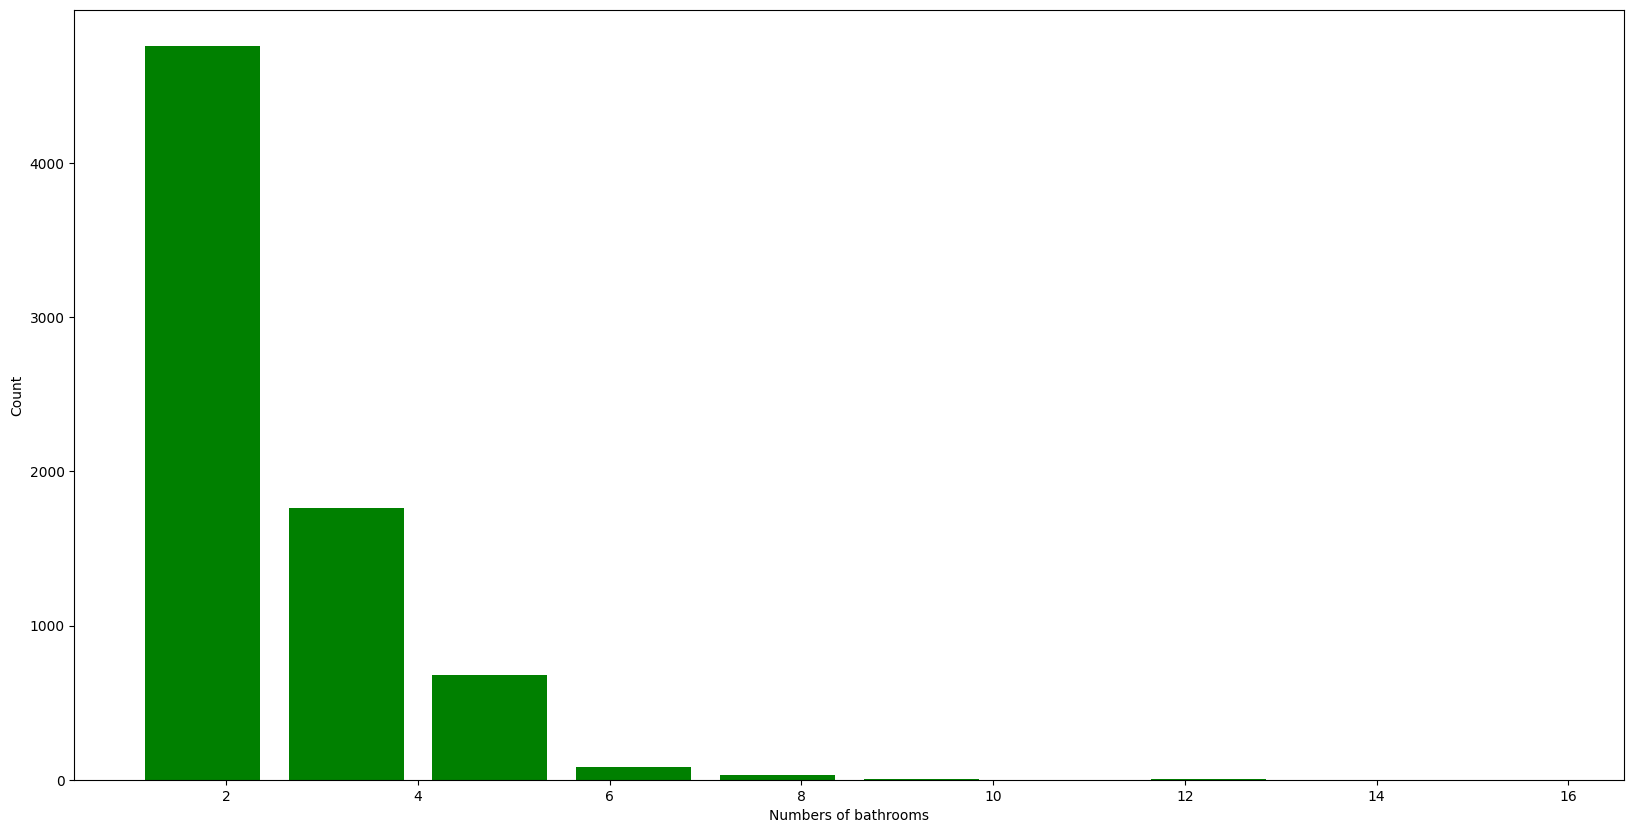

In [39]:
plt. rcParams['figure.figsize'] = (20,10)
plt.hist(data6.bath,rwidth=0.8, color="green")
plt.xlabel("Numbers of bathrooms")
plt.ylabel("Count")

    * Observation - This is a normal distribution, most houses have two to four bathrooms, with few outliers
        since the manager wants us to remove any bathroom that is +2 more than the number of the bedrooms, lets check them below and remove them

In [40]:
data6[data6.bath> data6.bhk+2] #---- these are the rooms that have two bathrooms more than the size of their bedroom

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [41]:
# Let remove these outliers
data7 = data6[data6.bath< data6.bhk+2]
data7.shape

(7239, 7)

In [42]:
data7.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


     we have to remove the price_per_sqft column, and the size as it is not required for our model., WE just used it to examine and remove our outliers. we already have a price column

In [43]:
data8 = data7.drop(["size","price_per_sqft",], axis="columns")
data8.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


## MODEL BUILDING
    1. kfold cross validation
    2. gride search  
        1. splitting the data into x and y variables 
        2. training and testing the data
        3.applying the model
        4. evaluating the model
        5. finding the best model with grid search and hyper parameter tunning
        6. predicting using the best model

since our computer cANT interprete categorical variables, we have to change the "location column to computer readable numbers". WE CAN do this usiing ONE HOT ENCODING.

In [44]:
dummies = pd.get_dummies(data8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
#concantenate it with its original family data frame
data9 = pd.concat([data8,dummies.drop('other',axis='columns')],axis='columns')
data9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
#since we have dummies as our location columns, lets drop the original location column
data10 = data9.drop('location',axis='columns')
data10.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
data10.shape

(7239, 244)

### 1.Lets split the data into y and x varaibles

In [48]:
#Our y will be our price coulmn while our X will be other columns
X = X = data10.drop(['price'],axis='columns')
X.head(3)


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:

X.shape

(7239, 243)

In [50]:
y = data10.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [51]:
len(y)

7239

### 2.We have to split our data into training and testing data

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


### 3. Create a Linear Regression model and fit your data

In [53]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)  #scores our model


0.8629132245229443

    *we can see that our model has an accuracy of 84%, but we can improve it by using other models. and we will use KFOLD CROSS VALIDATION
### 4. KFOLD CROSS VALIDATION  to measure accuracy of our LinearRegression

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

##### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

    * we can see that the model keeps performing weell above 80%, but we need to try more models to see if they can give us a better accuracy. we therefore use GRID SEARCH to find the best parameters for our model
## 5. GRID SEARCH CV
         Gride search CV is a life saver, it does not only tell your the score, it tells you the best parameters for your model. Which we call hyperparameters Tunning

In [55]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

def find_the_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'param': {
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'param': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'param': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    # Store the results in a variable called scores
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

    # Iterate through every algorithm and its parameters
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['param'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append(
            {
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            }
        )

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
result = find_the_best_model_using_gridsearchcv(X, y)


# Example usage
# Assuming X and y are already defined
# result = find_the_best_model_using_gridsearchcv(X, y)
# print(result)


In [56]:
# Initialize variables to store the best score and best model
best_score = float('-inf')
best_model = None
best_params = None

# Iterate over the rows of the result DataFrame to find the best model
for index, row in result.iterrows():
    if row['best_score'] > best_score:
        best_score = row['best_score']
        best_model = row['model']
        best_params = row['best_params']

print(f"The best model is {best_model} with a score of {best_score} and parameters {best_params}")


The best model is linear_regression with a score of 0.8402435206067281 and parameters {'regressor__fit_intercept': True}


##### * Based on above results we can say that LinearRegression gives the best score. Hence we will use that

### Test the model for few properties

In [57]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

lets know the price of 3 bedrooms and 2 bath in ist phase jp nagar

In [58]:
predict_price('1st Phase JP Nagar',1000, 3, 2)

C:\Users\test\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.58264928989004

lets know the price of 2 bedrooms and 2 bath in Indira Nagar

In [59]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\test\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179908

In [60]:

predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\test\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.8657025831225

#### observation: 
     some places are more expensove even with the number of the room and the bath. there could be many other factors that affect the price of the house. it could be size of room, distribution of data

### 7.Export the model to a pickle file
     we will export all our artifact.

In [61]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

     we should also export all our columns information. this is because of their inde and the  coulmn

In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
